In [1]:
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import config
from event_pipeline import Event
from obspy.imaging.spectrogram import spectrogram


def import_data(day, starttime, endtime):
    daypaths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day)
    starttime = obspy.UTCDateTime(starttime)
    endtime = obspy.UTCDateTime(endtime)
    data = load.import_corrected_data_for_single_day(daypaths)
    data.trim(starttime=starttime, endtime=endtime)
    return data

In [2]:
day141 = import_data(day=141, starttime='2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')

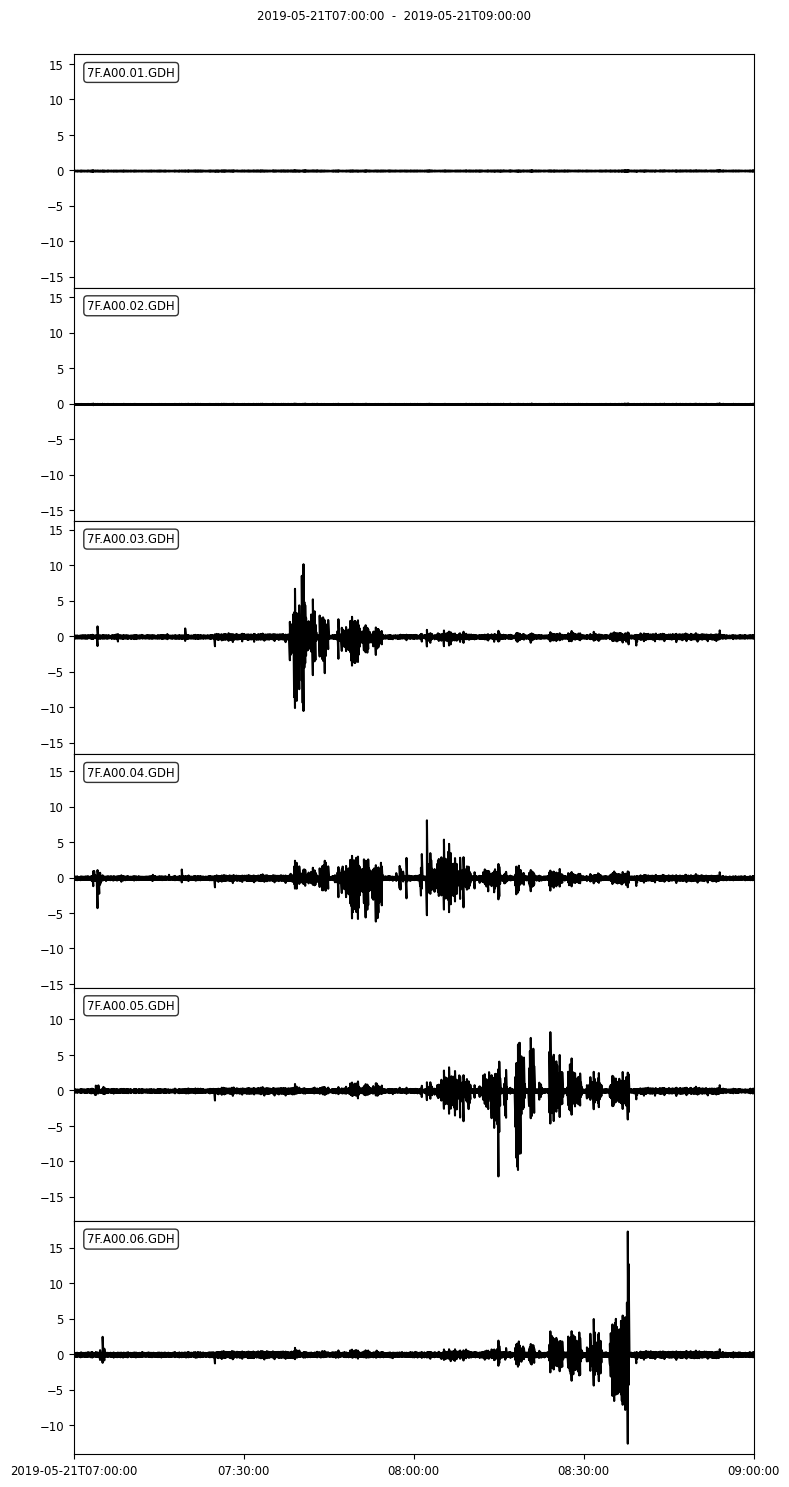

In [3]:
z = day141.plot()

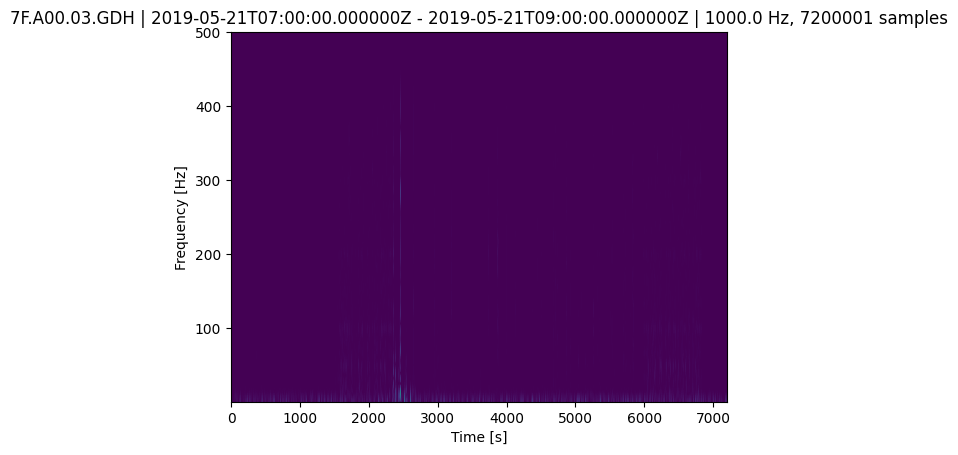

In [4]:
day141[2].spectrogram()

In [5]:
import torch

In [6]:
import torchaudio

In [7]:
import torchaudio.functional as F

In [8]:
import torchaudio.transforms as T

In [9]:
print(torch.__version__)
print(torchaudio.__version__)

import librosa

import matplotlib.pyplot as plt

2.1.2
2.1.2


In [10]:

ss = torchaudio.utils.download_asset('tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav')
ss

'/Users/mnky9800n/.cache/torch/hub/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

In [11]:
type(ss)

str

In [12]:
sw, sr = torchaudio.load(ss)

In [13]:
sw

tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])

In [14]:
sr

16000

In [15]:
day141[2].data

array([-0.09878623, -0.09497046, -0.08988275, ..., -0.08437108,
       -0.09624238, -0.10641779])

In [16]:
day141_t = torch.from_numpy(np.array([day141[2].data]))

In [17]:
spectrogram = T.Spectrogram(n_fft=1024)

In [18]:
spec = spectrogram(day141_t)

In [19]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest", cmap='Spectral_r')

In [20]:
spec.shape

torch.Size([1, 513, 14063])

In [21]:
d = day141[2]
day141

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.A00.02.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.A00.03.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.A00.04.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.A00.05.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.A00.06.GDH | 2019-05-21T07:00:00.000000Z - 2019-05-21T09:00:00.000000Z | 1000.0 Hz, 7200001 samples

In [26]:
day141_t.shape

torch.Size([1, 7200001])

In [29]:
spec[0].shape

torch.Size([513, 14063])

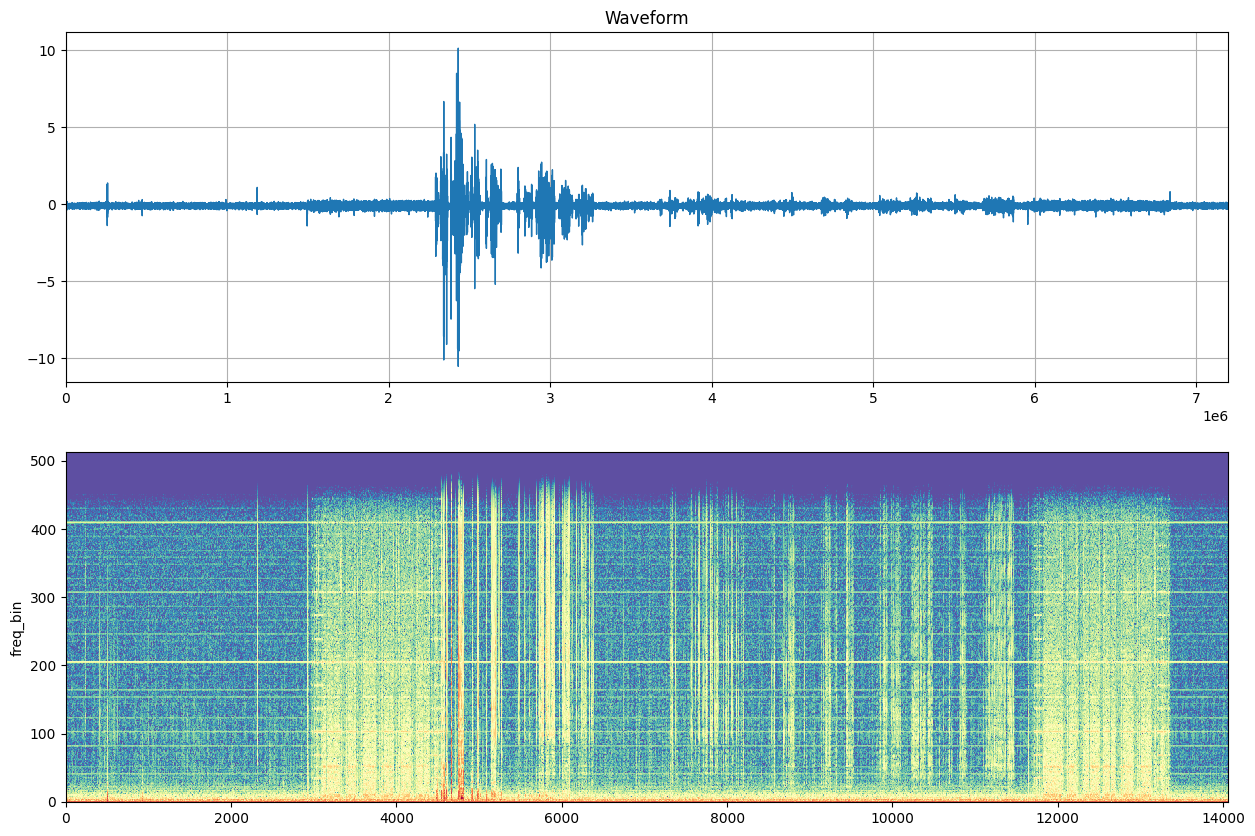

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
plot_waveform(day141_t, sr=1, ax=ax[0])
plot_spectrogram(spec[0], ax=ax[1])
# ax[0].set_xlim(4500, 5000)